# Top 10 Albums According to Review Scores

In [19]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import datetime
import calendar
import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None #'warn'
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as p
%matplotlib inline

In [20]:
album_details = pd.read_csv("World_Music_Album_Details.csv", sep = ",", na_values=["N/A"], encoding = 'latin-1')
band_details = pd.read_csv("World_Music_Bands_Details.csv",sep = ",", na_values=["N/A"], encoding = 'latin-1' )
review_details = pd.read_csv("World_Music_Reviews_Details.csv",sep = ",", na_values=["N/A"], encoding = 'latin-1' )

In [21]:
music_bands_albums_join = pd.merge(
    left=band_details, 
    right=album_details, 
    left_on="ID", 
    right_on="Band_ID", 
    suffixes=["_band", "_album"],
    how="left"
).drop("Band_ID", axis=1)

In [23]:
music_bands_albums_reviews_join = pd.merge(
    left=music_bands_albums_join, 
    right=review_details, 
    left_on="ID_album", 
    right_on="Album_ID", 
    suffixes=["", "_review"],
    how="left"
).drop("Album_ID", axis=1)

In [29]:
music_albums_reviews_count = music_bands_albums_reviews_join.groupby("ID_album")["ID"].count()
famous_albums = music_albums_reviews_count[music_albums_reviews_count >= 8].index.values
famous_bands_albums_reviews = music_bands_albums_reviews_join[music_bands_albums_reviews_join.ID_album.isin(famous_albums)]

In [25]:
top_albums = famous_bands_albums_reviews.groupby("ID_album")["Album_Score"].sum() / famous_bands_albums_reviews.groupby("ID_album")["Album_Score"].count()
top_albums = pd.DataFrame(top_albums.sort_values().tail(10))
top_albums.columns = ["average_score"] 

In [57]:
top_bands_albums = pd.merge(
    left = music_bands_albums_join,
    right = top_albums,
    left_on="ID_album",
    right_index=True
)[["Band_Name", "Album_Name", "average_score"]].sort_values("average_score", ascending = False)
top_bands_albums.to_csv('top10_reviewscores.csv')
top_bands_albums

,Band_Name,Album_Name,average_score
5300,Uncork,Anaclasis: A Haunting Gospel of Malice & Hatred,0.967500
1352,Loathsome Ritual,Realm of Chaos: Slaves to Darkness,0.940526
7242,Before God,Blod-draum,0.938750
5852,Warfire,Decimate Christendom,0.933750
7263,Belkant,Rise to Power,0.926250
1358,Loathsome Ritual,Those Once Loyal,0.922500
5766,Vow Dreams,Mondo Medicale,0.916429
13204,Sirventes,Uterovaginal Insertion of Extirpated Anomalies,0.916250
5848,Warfire,Upon the Throne of Apocalypse,0.915000
3133,Raw Level,Slumber of Sullen Eyes,0.915000


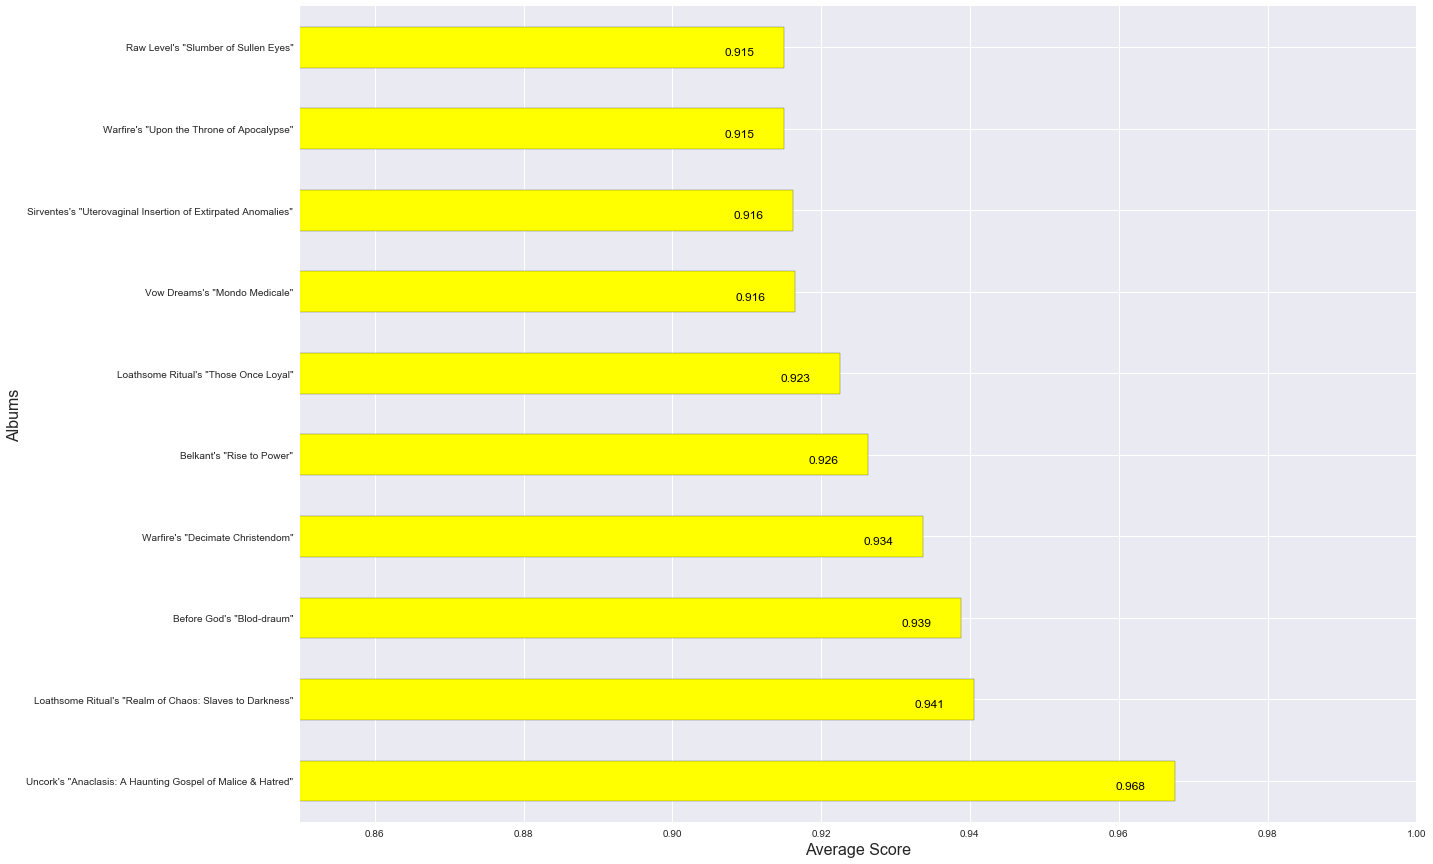

In [55]:
top_bands_albums["band/album"] = top_bands_albums.Band_Name + "'s \"" + top_bands_albums.Album_Name + "\""
top_bands_albums_plot = top_bands_albums[["band/album", "average_score"]].set_index("band/album").plot.barh(color="yellow", legend=False, figsize=(12, 12), xlim=[0.85, 1.0], edgecolor = '0.2')
top_bands_albums_labels = top_bands_albums_plot.set_xlabel("Average Score", fontsize = '16')
top_bands_albums_labels = top_bands_albums_plot.set_ylabel("Albums", fontsize = '16')

for y, x in zip(np.arange(0, top_bands_albums.shape[0]), top_bands_albums.average_score):
    plot = top_bands_albums_plot.annotate("{:.3f}".format(x), xy=(x-0.008, y-0.1), fontsize=12, color="black")
    
fig = plt.gcf()
fig.set_size_inches(20, 15)